In [1]:
from common import *
from matrix import *

/home/ec2-user/anaconda3/lib/python3.6/site-packages/pandas/core/common.py:701: RuntimeWarning: divide by zero encountered in log
  return func(obj, *args, **kwargs)


In [2]:
%matplotlib notebook
canvas(9, 6)

# Matrix Factorization

In [3]:
def_matrices(globals(), df) #day_filter(df, 246))

In [4]:
sfilt = ~stock_nvdf(dh, 246)

In [5]:
# T-SNE
# unnormalized y.T: perplexity=2 (n_iter=10000)
# normalized y.T: perplexity=10 (n_iter=1000)

In [6]:
_zero = -21.
Wstd = np.log(W).pipe(lambda X: (X - X.mean()) / X.var() ** .5)
Wstda = Wstd.fillna(_zero)
Wmstd = np.log(W).pipe(lambda X: (X - X.median()) / X.var() ** .5)
Wmstda = Wstd.fillna(_zero)

In [52]:
mat = Wstda

In [53]:
pearson = mat.corr(method='pearson')

In [54]:
spearman = mat.corr(method='spearman')

In [70]:
kendall = pd.DataFrame(np.load(top_dir + 'data/progress/kendalltau.npy'), index=range(N_STOCK), columns=range(N_STOCK))
kendall.columns.name = kendall.index.name = 'Stock'

In [89]:
dist = spearman ** -2 - 1 #kendall[sfilt].T[sfilt].T ** -2 - 1
#dist = dist.replace(np.inf, dist.replace(np.inf, 0).max().max() ** 2)
dist = dist.fillna(0)

In [47]:
from sklearn.manifold import TSNE
theX = Wmstda.T #np.log(W.fillna(W.min().min() ** 2)).T
#theX = center(theX)
vis = TSNE(n_components=2, perplexity=17, n_iter=1000).fit_transform(theX)

In [106]:
# canon
#vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-28_tsne_p30.npy')
#vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-18_tsne_p30.npy')
# 3 big group
#vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-22_tsne_p18_try1.npy')
# 2
#vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-21_tsne_p17.npy')
# small 3 and 1
#vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-21_tsne_p17_try2.npy')
# 4
#vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-28_tsne_p30.npy')

In [123]:
#market1 = market.copy()
#market1[g.kda4] = -1

In [229]:
list(enumerate(G))

[(0, {.big1}),
 (1, {.big2}),
 (2, {.big3}),
 (3, {.sml2}),
 (4, {.sml3}),
 (5, {.sml3x}),
 (6, {.tny1}),
 (7, {.tny2}),
 (8, {.twa4}),
 (9, {.twb4}),
 (10, 'ltl'),
 (11, 'lrg')]

<IPython.core.display.Javascript object>


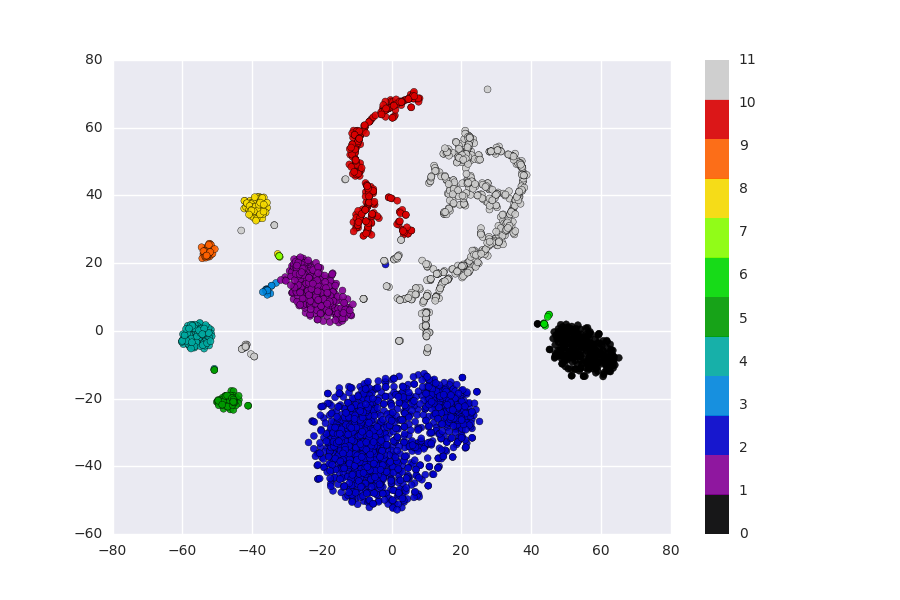

In [340]:
#from mpl_toolkits.mplot3d import Axes3D
#fig = plt.figure()
#ax = Axes3D(fig)
vis = np.load(top_dir + 'data/analysis/tsne_vis/Wstda-30_tsne_p30.npy')
plt.scatter(vis[:, 0], vis[:, 1], s=25, alpha=.9, c=group, cmap=plt.get_cmap('nipy_spectral', 12));
plt.colorbar(ticks=list(range(0, 12)));

In [341]:
g = O()

In [342]:
vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-28_tsne_p30.npy')
g.twb4 = (vis[:, 0] > -64) & (vis[:, 0] < -56) & (vis[:, 1] > -6) & (vis[:, 1] < 0)
g.twa4 = (vis[:, 0] > -50) & (vis[:, 0] < -35) & (vis[:, 1] > -6) & (vis[:, 1] < 5)

In [343]:
vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-21_tsne_p17_try2.npy')
g.sml3 = (vis[:, 0] > -55) & (vis[:, 0] < -40) & (vis[:, 1] > 40) & (vis[:, 1] < 55)
g.sml3x = (vis[:, 0] > -25) & (vis[:, 0] < -10) & (vis[:, 1] > 55) & (vis[:, 1] < 70)
g.big1 = (vis[:, 0] > 0) & (vis[:, 0] < 30) & (vis[:, 1] > 50) & (vis[:, 1] < 75)
g.tny1 = (vis[:, 0] > 11) & (vis[:, 0] < 16) & (vis[:, 1] > 44) & (vis[:, 1] < 47)

In [344]:
vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-21_tsne_p17.npy')
g.sml2 = (vis[:, 0] > -86) & (vis[:, 0] < -78) & (vis[:, 1] > -4) & (vis[:, 1] < 4)
g.tny24 = (vis[:, 0] > -50) & (vis[:, 0] < -48) & (vis[:, 1] > -54) & (vis[:, 1] < -52)
g.big2 = (vis[:, 0] > -80) & (vis[:, 0] < -45) & (vis[:, 1] > -50) & (vis[:, 1] < 0)

In [345]:
vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-22_tsne_p18_try1.npy')
g.big3 = (vis[:, 0] > -60) & (vis[:, 0] < -7) & (vis[:, 1] > -50) & (vis[:, 1] < 20)

In [346]:
try:
    g.tny2 = g.tny24
    del g.tny24
except (KeyError, AttributeError):
    pass
G = pd.DataFrame(dict(**g), index=W.columns)
G.tny2 &= (market == 2)

In [347]:
try:
    del G['rst']
except KeyError:
    pass
rst = ~reduce(lambda x, y: x | y, G.values.T)
G['rst'] = rst

In [348]:
G.rst.sum()

1019

In [349]:
G.to_hdf(top_dir + 'data/analysis/G0.hdf5', key='G')

In [350]:
vis = np.load(top_dir + 'data/analysis/tsne_vis/Wmstda-28_tsne_p30.npy')
# excluded odd one out in big3
sel = (vis[:, 0] > 18) & (vis[:, 0] < 22) & (vis[:, 1] > 36) & (vis[:, 1] < 40)
G.big3 |= sel
# excluded odd one out in big2
sel = (vis[:, 0] > 18) & (vis[:, 0] < 22) & (vis[:, 1] > -18) & (vis[:, 1] < -16)
G.big2 |= sel
# another singled out pair(!) of guys in 1's island
sel = (vis[:, 0] > 42) & (vis[:, 0] < 44) & (vis[:, 1] > 0) & (vis[:, 1] < 5)
G.tny1 |= sel
# the smaller of the two "other" parts
box0 = (vis[:, 0] > -10) & (vis[:, 0] < 20) & (vis[:, 1] > -50) & (vis[:, 1] < -30)
box1 = (vis[:, 0] > -15) & (vis[:, 0] < 15) & (vis[:, 1] > -75) & (vis[:, 1] < -50)
try:
    del G['rst']
except KeyError:
    pass
G['ltl'] = box0 | box1
G['lrg'] = ~reduce(lambda x, y: x | y, G.values.T)

In [352]:
#G.to_hdf(top_dir + 'data/analysis/G1.hdf5', key='G')
G = pd.read_hdf(top_dir + 'data/analysis/G1.hdf5')

In [319]:
Gnum = G.astype(int)
for i, c in enumerate(Gnum.values.T):
    c *= i
group = Gnum.T.sum().T
group.to_hdf(top_dir + 'data/analysis/group1.hdf5', key='group')

In [353]:
tny2 = G.tny2
del G['tny2']
G.big2 |= tny2

In [49]:
np.save(top_dir + 'data/analysis/tsne_vis/Wmstda-21_tsne_p17_try2', vis)

In [ ]:
'''# How to do ZCA using sklearn's PCA
# c.f. Michael Eickenberg on Google https://groups.google.com/forum/#!topic/theano-users/_63ggUdWeEI
pca = PCA(whiten=True)
transformed = pca.fit_transform(data)
pca.whiten = False
zca = pca.inverse_transform(transformed)
'''

In [116]:
theY, theW = (Y - Y.mean()).fillna(0).T, W.fillna(0).T
f = skPCA(theY.shape[0], whiten=True)
Yf = f.fit_transform(theY, weights=theW)
f.whiten=False
Ywhiten = f.inverse_transform(Yf)

TypeError: __init__() got an unexpected keyword argument 'whiten'

In [ ]:
# outliers when I didn't remove stocks with not enough valid dates

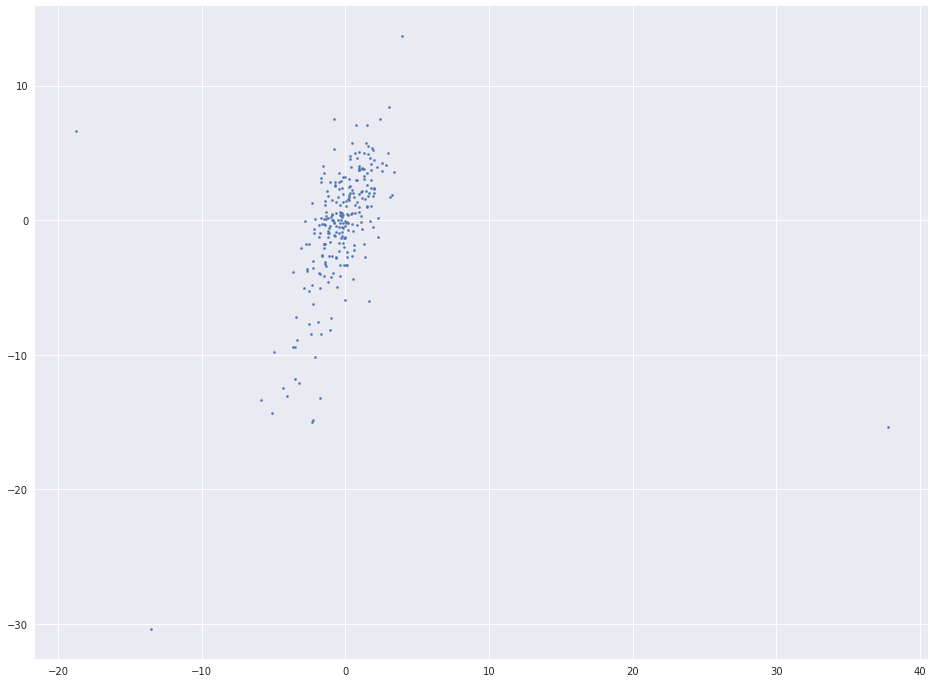

In [201]:
h = plt.scatter(Yf[:, 0], Yf[:, 1], s=5)

In [213]:
(
    (Yf[:, 0] > 30).nonzero() +
    (Yf[:, 0] < -15).nonzero() +
    (Yf[:, 1] < -30).nonzero() +
    (Yf[:, 1] > 10).nonzero() +
())

(array([257]), array([256]), array([253]), array([127]))